In [1]:
#Data Scraping from Twitter
import requests
from requests_oauthlib import OAuth1Session
import tweepy
import numpy as np
import pandas as pd

In [2]:
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("API_Key", 
    "API_Secret_Key")
auth.set_access_token("Access Token", 
    "Access_Token_Secret")

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [3]:
keywords = ['web3']
output = []
for keyword in keywords:
    tweets = tweepy.Cursor(api.search,q = keyword, lang ='en',since='2022-06-10', until= '2022-06-14').items(1000)
    for tweet in tweets:
        tweets_list = [[tweet.text, tweet.id_str, tweet.user.screen_name, tweet.coordinates, tweet.place, tweet.created_at]]
        line = {'Tweet Text' : tweet.text, 'Tweet Id' : tweet.id_str, 'Twitter @ Name' : tweet.user.screen_name, 'Tweet Coordinates' : tweet.coordinates, 'Place Info' : tweet.place, 'Date' : tweet.created_at, 'Keyword' : keyword}
        output.append(line)

Rate limit reached. Sleeping for: 213


In [12]:
tweets_df.reset_index()
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 997
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tweet Text         600 non-null    object
 1   Tweet Id           600 non-null    object
 2   Twitter @ Name     600 non-null    object
 3   Tweet Coordinates  0 non-null      object
 4   Place Info         4 non-null      object
 5   Date               600 non-null    object
 6   Keyword            600 non-null    object
 7   Time               600 non-null    object
 8   Dates              600 non-null    object
dtypes: object(9)
memory usage: 46.9+ KB


In [13]:
tweets_df = tweets_df.drop(columns=['Tweet Id','Twitter @ Name','Tweet Coordinates','Place Info'])

In [67]:
#Data Transformation
tweets_df = tweets_df.drop_duplicates(subset={"Tweet Text"})
tweets_df['Time'] = pd.to_datetime(tweets_df['Date']).dt.time
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.date
tweets_df.head()

,Tweet Text,Date,Keyword,Time,Dates,Hashtags
0,join us on tues june at pm est pm post with sp...,2022-06-13,web3,23:59:59,2022-06-13,"[nft,web3,n…]"
1,were not done days code code newbie women code...,2022-06-13,web3,23:59:58,2022-06-13,"[100daysofcode,codenewbie,womenwhocode,program..."
2,music nuts will similarly change how fans inte...,2022-06-13,web3,23:59:58,2022-06-13,[]
3,to everyone reaching out please be mindful i a...,2022-06-13,web3,23:59:56,2022-06-13,[]
4,i will be here for life so i look forward to f...,2022-06-13,web3,23:59:55,2022-06-13,[]


In [17]:
import contractions
import re
tweets_df["Tweet Text"]= tweets_df["Tweet Text"].str.lower()
#contractions.add("ur", 'your')
tweets_df["Tweet Text"] = [contractions.fix(s, slang=True) for s in tweets_df["Tweet Text"]]
#Dealing with regular expressions
tweets_df["Tweet Text"] = [re.sub(r"http\S+", "", str(x)) for x in tweets_df["Tweet Text"]]
tweets_df["Tweet Text"] = [re.sub(r"@\S+", "", str(x)) for x in tweets_df["Tweet Text"]]
#Separating hashtags in a separate column
tweets_df["Hashtags"]= [re.findall(r"#\S+", str(x)) for x in tweets_df["Tweet Text"]]
#Dealing with regular expressions
tweets_df["Tweet Text"] = [re.sub(r"rt", "", str(x)) for x in tweets_df["Tweet Text"]]
tweets_df["Tweet Text"] = [re.sub(r"#", "", str(x)) for x in tweets_df["Tweet Text"]]
tweets_df["Tweet Text"] = [re.sub(r"\d+", "", str(x)) for x in tweets_df["Tweet Text"]]
#Remove punctuations
tweets_df["Tweet Text"] = [re.sub(r"[^\w\s]", "", str(x)) for x in tweets_df["Tweet Text"]]

In [66]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 997
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet Text  600 non-null    object
 1   Date        600 non-null    object
 2   Keyword     600 non-null    object
 3   Time        600 non-null    object
 4   Dates       600 non-null    object
 5   Hashtags    600 non-null    object
dtypes: object(6)
memory usage: 32.8+ KB


In [65]:
tweets_df

,Tweet Text,Date,Keyword,Time,Dates,Hashtags
0,join us on tues june at pm est pm post with sp...,2022-06-13,web3,23:59:59,2022-06-13,"[nft,web3,n…]"
1,were not done days code code newbie women code...,2022-06-13,web3,23:59:58,2022-06-13,"[100daysofcode,codenewbie,womenwhocode,program..."
2,music nuts will similarly change how fans inte...,2022-06-13,web3,23:59:58,2022-06-13,[]
3,to everyone reaching out please be mindful i a...,2022-06-13,web3,23:59:56,2022-06-13,[]
4,i will be here for life so i look forward to f...,2022-06-13,web3,23:59:55,2022-06-13,[]
...,...,...,...,...,...,...
987,we are super excited to announce this weeks am...,2022-06-13,web3,23:34:00,2022-06-13,[ama]
991,𝙀𝙨𝙩𝙖𝙗𝙡𝙞𝙨𝙝 of of 𝙗𝙧𝙖𝙣𝙙 𝙤𝙣𝙡𝙞𝙣𝙚 a a 𝙜𝙧𝙚𝙖𝙩 𝙙𝙤𝙢𝙖𝙞𝙣 ...,2022-06-13,web3,23:33:57,2022-06-13,"[generic,oneworddomains,ads,domains,staup,disc..."
994,web is about being responsible for your own sh...,2022-06-13,web3,23:33:53,2022-06-13,[]
996,hooked up with a ledger his first not from wel...,2022-06-13,web3,23:33:48,2022-06-13,[]


In [64]:
tweets_df.to_csv('web3.csv')

(-0.5, 399.5, 199.5, -0.5)

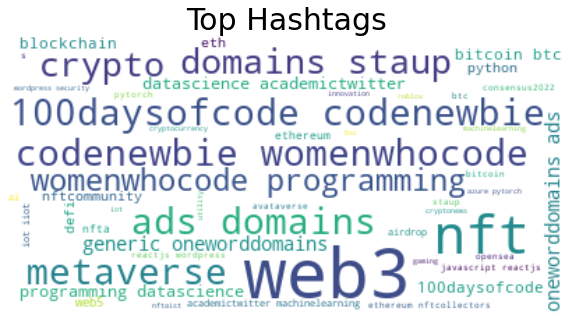

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Visualizing Data distribution
from wordcloud import WordCloud, STOPWORDS

#Changing the multiple list into a string
web3_wordcloud ="".join(str(words) for words in tweets_df['Hashtags'])

web3_wordcloud_hashtags = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(web3_wordcloud)

fig, ax = plt.subplots(1, 1, figsize  = (10,10))
ax.imshow(web3_wordcloud_hashtags, interpolation='bilinear')
ax.set_title('Top Hashtags', fontsize=30)
ax.axis('off')

Text(0.5, 0, 'Web3 Hashtags')

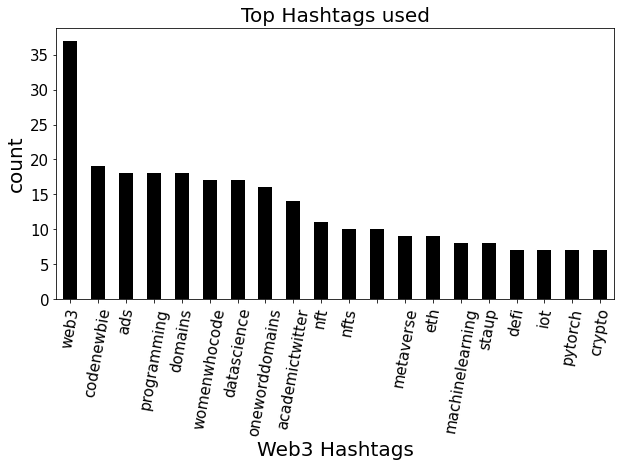

In [59]:
#Top 5 HAshtags of a user used and its count
import pandas as pd

web3_top_hashtags=pd.Series(web3_wordcloud.split(',')).value_counts()[:20]
web3_top_hashtags
fig, ax = plt.subplots(1, 1, figsize  = (10,5))
ax = web3_top_hashtags.plot.bar(x='web3_top_hashtags', y='Count',rot=80, fontsize=15, color='black')
ax.set_title('Top Hashtags used', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.set_xlabel('Web3 Hashtags', fontsize=20)